In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('C:/Data Analyst/Data Analysis with python/Datasets/train.csv')


In [3]:
# data['Product_Category_2'].fillna(-1,inplace=True)

# data['Product_Category_3'].fillna(-1,inplace=True)
data['Product_Category_2'].fillna(0,inplace=True)

data['Product_Category_3'].fillna(0,inplace=True)

In [ ]:
data['Total_Product']=data['Product_Category_1']+data['Product_Category_2']+data['Product_Category_3'] #did this for better accuracy.


data.drop(columns=['User_ID','Product_ID'],inplace=True)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  Total_Product               550068 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 46.2+ MB


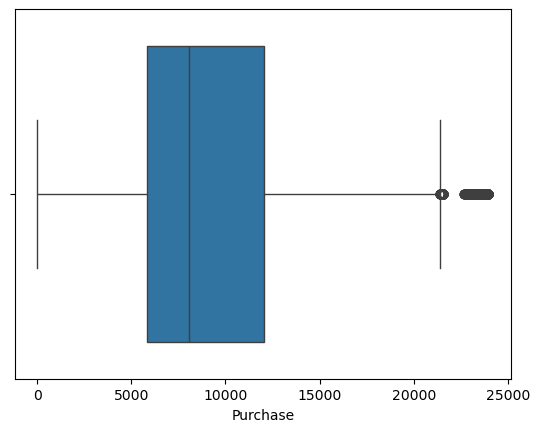

In [5]:

import matplotlib.pyplot as plt

sns.boxplot(x=data['Purchase'])
plt.show()

In [6]:
Q1 = data['Purchase'].quantile(0.25)
Q3 = data['Purchase'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = data[(data['Purchase'] < lower_limit) | (data['Purchase'] > upper_limit)]
data = data[(data['Purchase'] >= lower_limit) & (data['Purchase'] <= upper_limit)]



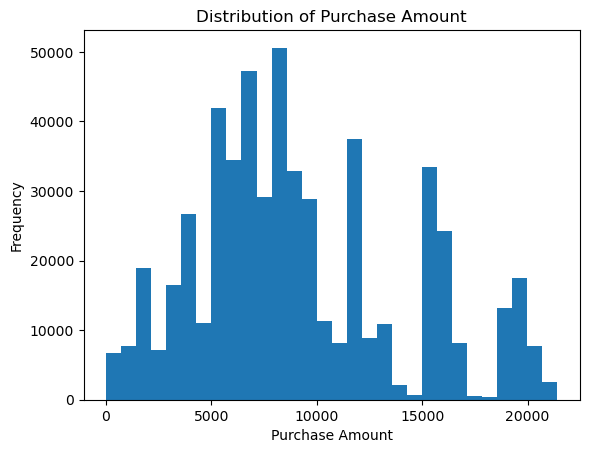

In [ ]:
import matplotlib.pyplot as plt

plt.hist(data['Purchase'], bins=30)  
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase Amount')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].replace('4+',4).astype(int)

X = data.drop('Purchase', axis=1)  
y = data['Purchase']  


# Segment the data based on the purchase
segment_1 = data[data['Purchase'] <= 10000]  # People spending between 0-10k
segment_2 = data[(data['Purchase'] > 10000) & (data['Purchase'] <= 25000)]  # People spending between 10k-25k


# Segment 1: People spending between 0-10k
X_segment_1 = segment_1.drop('Purchase', axis=1)
y_segment_1 = segment_1['Purchase']

# Segment 2: People spending between 10k-25k
X_segment_2 = segment_2.drop('Purchase', axis=1)
y_segment_2 = segment_2['Purchase']

# Spliting each segment into train and test sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_segment_1, y_segment_1, test_size=0.3, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_segment_2, y_segment_2, test_size=0.3, random_state=42)

In [24]:
X_train_1.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Total_Product'],
      dtype='object')

In [ ]:
# import numpy as np
# from scipy.stats import boxcox

# # Apply Box-Cox to the training target variables (y_train_1, y_train_2)
# y_train_1, lambda_1 = boxcox(y_train_1)
# y_train_2, lambda_2 = boxcox(y_train_2)

# # Apply the same Box-Cox transformation to the test target variables (y_test_1, y_test_2)
#  Using the same lambda values to transform the test data
# y_test_1 = (y_test_1 ** lambda_1 - 1) / lambda_1 if lambda_1 != 0 else np.log(y_test_1)
# y_test_2 = (y_test_2 ** lambda_2 - 1) / lambda_2 if lambda_2 != 0 else np.log(y_test_2)

# # Check transformed values
# print("Transformed y_train_1:", y_train_1[:5])  
# print("Transformed y_train_2:", y_train_2[:5])  
# print("Transformed y_test_1:", y_test_1[:5])    
# print("Transformed y_test_2:", y_test_2[:5])    


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np


# Segment 1


# Identifying categorical and numerical columns
cat_cols_1 = [col for col in X_train_1.columns if X_train_1[col].dtype == 'O']
num_cols_1 = [col for col in X_train_1.columns if col not in cat_cols_1]

print("Segment 1 Categorical Columns:", cat_cols_1)
print("Segment 1 Numerical Columns:", num_cols_1)

# Defining ColumnTransformer for segment 1
column_transformer_1 = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first'), cat_cols_1)
    ],
    remainder='passthrough'
)

# Fit and transform segment 1
X_train_1_encoded = column_transformer_1.fit_transform(X_train_1)
X_test_1_encoded = column_transformer_1.transform(X_test_1)

#final feature names
encoded_feature_names_1 = column_transformer_1.named_transformers_['encoder'].get_feature_names_out(cat_cols_1)
final_feature_names_1 = np.concatenate([encoded_feature_names_1, num_cols_1])

# Converting to DataFrame
X_train_1_transformed = pd.DataFrame(X_train_1_encoded, columns=final_feature_names_1, index=X_train_1.index)
X_test_1_transformed = pd.DataFrame(X_test_1_encoded, columns=final_feature_names_1, index=X_test_1.index)



#Segment 2


# Identifying categorical and numerical columns
cat_cols_2 = [col for col in X_train_2.columns if X_train_2[col].dtype == 'O']
num_cols_2 = [col for col in X_train_2.columns if col not in cat_cols_2]

print("Segment 2 Categorical Columns:", cat_cols_2)
print("Segment 2 Numerical Columns:", num_cols_2)

# Defining ColumnTransformer for segment 2
column_transformer_2 = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first'), cat_cols_2)
    ],
    remainder='passthrough'
)

# Fit and transform segment 2
X_train_2_encoded = column_transformer_2.fit_transform(X_train_2)
X_test_2_encoded = column_transformer_2.transform(X_test_2)

#final feature names
encoded_feature_names_2 = column_transformer_2.named_transformers_['encoder'].get_feature_names_out(cat_cols_2)
final_feature_names_2 = np.concatenate([encoded_feature_names_2, num_cols_2])

# Converting to DataFrame
X_train_2_transformed = pd.DataFrame(X_train_2_encoded, columns=final_feature_names_2, index=X_train_2.index)
X_test_2_transformed = pd.DataFrame(X_test_2_encoded, columns=final_feature_names_2, index=X_test_2.index)


Segment 1 Categorical Columns: ['Gender', 'Age', 'City_Category']
Segment 1 Numerical Columns: ['Occupation', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Total_Product']
Segment 2 Categorical Columns: ['Gender', 'Age', 'City_Category']
Segment 2 Numerical Columns: ['Occupation', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Total_Product']


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.base import clone

#model definition
base_model = RandomForestRegressor(
    n_estimators=100,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    max_depth=20,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)


#Segment 1

print("======= Segment 1 Results =======\n")

model_low = clone(base_model)
model_low.fit(X_train_1_transformed, y_train_1)

# Predictions
y_train_1_pred = model_low.predict(X_train_1_transformed)
y_test_1_pred = model_low.predict(X_test_1_transformed)

print("Training Accuracy:")
print(f'Training MSE: {mean_squared_error(y_train_1, y_train_1_pred)}')
print(f'Training MAE: {mean_absolute_error(y_train_1, y_train_1_pred)}')
print(f'Training R2: {r2_score(y_train_1, y_train_1_pred)}\n')

print("Testing Accuracy:")
print(f'Testing MSE: {mean_squared_error(y_test_1, y_test_1_pred)}')
print(f'Testing MAE: {mean_absolute_error(y_test_1, y_test_1_pred)}')
print(f'Testing R2: {r2_score(y_test_1, y_test_1_pred)}\n')


#Segment 2

print("======= Segment 2 Results =======\n")

model_high = clone(base_model)
model_high.fit(X_train_2_transformed, y_train_2)

# Predictions
y_train_2_pred = model_high.predict(X_train_2_transformed)
y_test_2_pred = model_high.predict(X_test_2_transformed)

print("Training Accuracy:")
print(f'Training MSE: {mean_squared_error(y_train_2, y_train_2_pred)}')
print(f'Training MAE: {mean_absolute_error(y_train_2, y_train_2_pred)}')
print(f'Training R2: {r2_score(y_train_2, y_train_2_pred)}\n')

print("Testing Accuracy:")
print(f'Testing MSE: {mean_squared_error(y_test_2, y_test_2_pred)}')
print(f'Testing MAE: {mean_absolute_error(y_test_2, y_test_2_pred)}')
print(f'Testing R2: {r2_score(y_test_2, y_test_2_pred)}\n')


======= Segment 1 Results =======

Training Accuracy:
Training MSE: 2937497.5440057414
Training MAE: 1375.6461969145523
Training R2: 0.49627232320832293

Testing Accuracy:
Testing MSE: 3244600.7303970614
Testing MAE: 1448.93446597892
Testing R2: 0.44151192410689

======= Segment 2 Results =======

Training Accuracy:
Training MSE: 5863561.4532957645
Training MAE: 1961.8581602976574
Training R2: 0.39440846287783937

Testing Accuracy:
Testing MSE: 6952482.091584319
Testing MAE: 2139.7076436859006
Testing R2: 0.27981636079459526



In [ ]:
import pandas as pd

#DataFrames from predictions
df_pred_1 = pd.DataFrame({
    'Actual': y_test_1,
    'Predicted': y_test_1_pred
}, index=y_test_1.index)

df_pred_2 = pd.DataFrame({
    'Actual': y_test_2,
    'Predicted': y_test_2_pred
}, index=y_test_2.index)

# Combining both predictions
final_predictions = pd.concat([df_pred_1, df_pred_2])

# Sorting by index
final_predictions = final_predictions.sort_index()

# Final output
print(final_predictions.head())


    Actual     Predicted
0     8370   6602.664604
1    15200  15853.384302
3     1057   1496.271143
8    15686  15659.443749
11    3957   6548.098581


In [13]:
from sklearn.metrics import r2_score

# Combined R2 score
combined_r2 = r2_score(final_predictions['Actual'], final_predictions['Predicted'])

print(f'Combined R2 Score: {combined_r2:.4f}')


Combined R2 Score: 0.8151


In [ ]:
from sklearn.metrics import r2_score

#DataFrames for training predictions
df_train_pred_1 = pd.DataFrame({
    'Actual': y_train_1,
    'Predicted': y_train_1_pred
}, index=y_train_1.index)

df_train_pred_2 = pd.DataFrame({
    'Actual': y_train_2,
    'Predicted': y_train_2_pred
}, index=y_train_2.index)

# Combining both train predictions
final_train_predictions = pd.concat([df_train_pred_1, df_train_pred_2])

# Sorting by index
final_train_predictions = final_train_predictions.sort_index()

#Training R2
combined_train_r2 = r2_score(final_train_predictions['Actual'], final_train_predictions['Predicted'])

print(f'Combined Training R2 Score: {combined_train_r2:.4f}')


Combined Training R2 Score: 0.8386


In [ ]:
#TUNING THE HYPERPARAMETERS



# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestRegressor
# import numpy as np


# param_dist = {
#     'n_estimators': [100, 200, 300],  
#     'max_depth': [None, 10, 20, 30],   
#     'min_samples_split': [2, 5, 10],   
#     'min_samples_leaf': [1, 2, 4],     
#     'max_features': ['sqrt', 'log2'],  
#     'bootstrap': [True, False]         
# }


# rf_model = RandomForestRegressor(random_state=42)


# random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
#                                    n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1, error_score='raise')


# random_search.fit(X_train_1_transformed, y_train_1)  
# random_search.fit(X_train_2_transformed, y_train_2)  


# best_params_1 = random_search.best_params_
# best_params_2 = random_search.best_params_

# print("Best Parameters for Segment 1:", best_params_1)
# print("Best Parameters for Segment 2:", best_params_2)


# best_rf_model_1 = random_search.best_estimator_
# best_rf_model_2 = random_search.best_estimator_


# y_train_1_pred = best_rf_model_1.predict(X_train_1_transformed)
# y_train_2_pred = best_rf_model_2.predict(X_train_2_transformed)


# from sklearn.metrics import r2_score
# print(f"Training R² for Segment 1: {r2_score(y_train_1, y_train_1_pred):.4f}")
# print(f"Training R² for Segment 2: {r2_score(y_train_2, y_train_2_pred):.4f}")


# y_test_1_pred = best_rf_model_1.predict(X_test_1_transformed)
# y_test_2_pred = best_rf_model_2.predict(X_test_2_transformed)


# print(f"Test R² for Segment 1: {r2_score(y_test_1, y_test_1_pred):.4f}")
# print(f"Test R² for Segment 2: {r2_score(y_test_2, y_test_2_pred):.4f}")


In [ ]:
import joblib

#trained models for both segments
joblib.dump(model_low, 'random_forest_segment1.pkl')
joblib.dump(model_high, 'random_forest_segment2.pkl')

#transformers for both segments
joblib.dump(column_transformer_1, 'transformer_segment1.pkl')
joblib.dump(column_transformer_2, 'transformer_segment2.pkl')


['transformer_segment2.pkl']